# German credit

**Make some plot**

**Info of database**

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

Risk (Value target - Good or Bad Risk)

**Импортируем библиотеки:**

In [3]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly.graph_objs as go #Math plot
import plotly.offline as py 
py.init_notebook_mode(connected=True) #For work with plot
import plotly.tools as tls # Usefull tools for plotly
import warnings # May be will ignore some mistake:)
import scipy.stats as ss # For work with stats

**Подгружаем датасет**

In [4]:
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

**First Look**

    1. Overview of types.
    2. Dimension.
    3. Check for zeros.
    4. Unique values.
    5. Convert column names.
    6. Output of the first lines.

In [5]:
print(df_credit.info())
print(df_credit.shape)
df_credit = df_credit.fillna(0)
print(df_credit.nunique())
df_credit.columns = df_credit.columns.str.lower()
#df_credit.columns = df_credit.columns.str.replace(' ', '_')
df_credit.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None
(1000, 10)
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       5
Checking account      4
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,0,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,0,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**Some explorations:**

<Axes: xlabel='risk'>

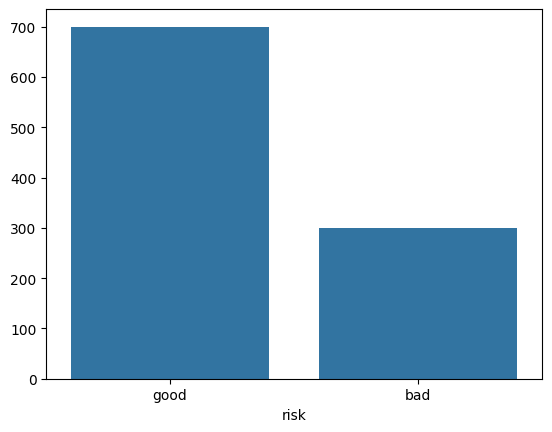

In [6]:
df_good = df_credit[df_credit["risk"] == 'good']
df_bad = df_credit[df_credit["risk"] == 'bad']
sns.barplot(x=df_credit['risk'].value_counts().index, y=df_credit['risk'].value_counts().values)

<Axes: xlabel='age', ylabel='Count'>

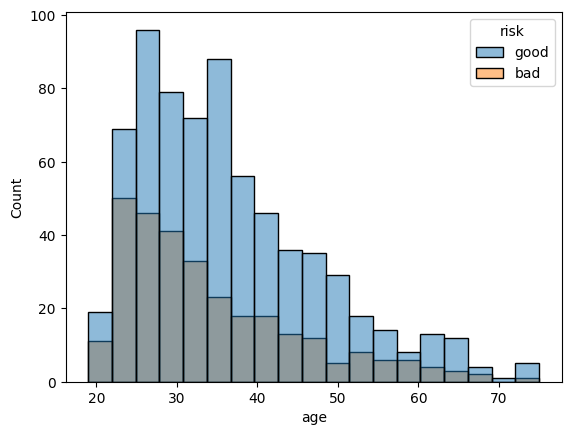

In [7]:
sns.histplot(data=df_credit, x="age", hue="risk")

In [8]:
trace0 = go.Bar(
            x = df_good["risk"].value_counts().index.values,
            y = df_good["risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_bad["risk"].value_counts().index.values,
            y = df_bad["risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Distribution risk'
    ),
    title='Distribution risk'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='risk_variable_plot')

**Age distribution**

In [9]:
trace0 = go.Histogram(
            x = df_good['age'].values.tolist(),
            histnorm='probability',
            name = 'Good credit'
)
trace1 = go.Histogram(
            x = df_bad['age'].values.tolist(),
            histnorm='probability',
            name = 'Bad credit'
)
trace2 = go.Histogram(x = df_credit['age'].values.tolist(),
                      histnorm='probability',
                      name = 'General population')

fig = tls.make_subplots(rows = 2, cols = 2, specs = [[{}, {}], [{"colspan":2}, None]],
                        subplot_titles = ('Good credit', 'Bad credit', 'General population'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend = True, title = 'Age distribution')
py.iplot(fig, filename = 'age_distribution')

/home/eugeni/.local/lib/python3.8/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Correlation of loan amount and age ranges**

In [10]:
ranges = (18, 25, 35, 60, 120)
category = ('Student', 'Youthful', 'Old', 'Oldest')
df_credit['age_cat'] = pd.cut(df_credit.age, ranges, labels=category)

df_good = df_credit[df_credit["risk"] == 'good']
df_bad = df_credit[df_credit["risk"] == 'bad']

trace0 = go.Box(
    x = df_good['age_cat'],
    y = df_good['credit amount'],
    name = 'Good credit'
)
trace1 = go.Box(
    x = df_bad['age_cat'],
    y = df_bad['credit amount'],
    name = 'Bad credit'
)
data = [trace0, trace1]
layout = go.Layout(
            xaxis = dict(
                title = 'Age category'
            ),
            yaxis = dict(title = 'Amount in dollar'
                        ),
            boxmode= 'group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'box-age-cat')

**Разбивка по домам**

In [11]:
trace0 = go.Bar(
            x = df_good['housing'].value_counts().index.values,
            y = df_good['housing'].value_counts().values,
            name = 'Good credit'
)
trace1 = go.Bar(
            x = df_bad['housing'].value_counts().index.values,
            y = df_bad['housing'].value_counts().values,
            name = 'Bad credit'
)
data = [trace0, trace1]
layout = go.Layout(
            xaxis = dict(title = 'Type of house'),
            yaxis = dict(title = 'Count')
            )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'bar-house')

**Зависимость суммы кредита типа жилья**

In [12]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['housing'],
            "y": df_good['credit amount'],
            "legendgroup": 'Good credit',
            "scalegroup": 'No',
            "name": 'Good credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['housing'],
            "y": df_bad['credit amount'],
            "legendgroup": 'Bad credit',
            "scalegroup": 'No',
            "name": 'Bad credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'red'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

In [14]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['job'],
            "y": df_good['credit amount'],
            "legendgroup": 'Good credit',
            "scalegroup": 'No',
            "name": 'Good credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['job'],
            "y": df_bad['credit amount'],
            "legendgroup": 'Bad credit',
            "scalegroup": 'No',
            "name": 'Bad credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'red'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

**Разбивка по полу**

In [15]:
trace0 = go.Bar(
            x = df_good['sex'].value_counts().index.values,
            y = df_good['sex'].value_counts().values,
            name = 'Good credit'
)
trace1 = go.Bar(
            x = df_bad['sex'].value_counts().index.values,
            y = df_bad['sex'].value_counts().values,
            name = 'Good credit'
)
data = [trace0, trace1]
layout = go.Layout(
            xaxis = dict(title = 'Sex'),
            yaxis = dict(title = 'Count'))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'sex-distribuition')

In [16]:
trace0 = go.Box(
            x = df_good['sex'],
            y = df_good['credit amount'],
            name = 'Good credit',
            marker = dict(color = 'green')
)
trace1 = go.Box(
            x = df_bad['sex'],
            y = df_bad['credit amount'],
            name = 'Good credit',
            marker = dict(color = 'red')
)
data = [trace0, trace1]
layout = go.Layout(
            xaxis = dict(title = 'Sex'),
            yaxis = dict(title = 'Count'),
            boxmode = 'group')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'sex-distribuition')

In [17]:
trace0 = go.Box(
            x = df_good['purpose'],
            y = df_good['credit amount'],
            name = 'Good credit',
            marker = dict(color = 'green')
)
trace1 = go.Box(
            x = df_bad['purpose'],
            y = df_bad['credit amount'],
            name = 'Good credit',
            marker = dict(color = 'red')
)
data = [trace0, trace1]
layout = go.Layout(
            xaxis = dict(title = 'Purpose'),
            yaxis = dict(title = 'Amount'),
            boxmode = 'group')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'purpose-distribuition')

In [16]:
df_credit

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk,age_cat
0,67,male,2,own,0,little,1169,6,radio/TV,good,Старшие
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Студенты
2,49,male,1,own,little,0,2096,12,education,good,Взрослые
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Взрослые
4,53,male,2,free,little,little,4870,24,car,bad,Взрослые
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,0,1736,12,furniture/equipment,good,Молодые
996,40,male,3,own,little,little,3857,30,car,good,Взрослые
997,38,male,2,own,little,0,804,12,radio/TV,good,Взрослые
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Студенты


In [17]:
df_credit.columns = df_credit.columns.str.replace(' ', '_')
df_credit

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,age_cat
0,67,male,2,own,0,little,1169,6,radio/TV,good,Старшие
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Студенты
2,49,male,1,own,little,0,2096,12,education,good,Взрослые
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Взрослые
4,53,male,2,free,little,little,4870,24,car,bad,Взрослые
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,0,1736,12,furniture/equipment,good,Молодые
996,40,male,3,own,little,little,3857,30,car,good,Взрослые
997,38,male,2,own,little,0,804,12,radio/TV,good,Взрослые
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Студенты


<Axes: >

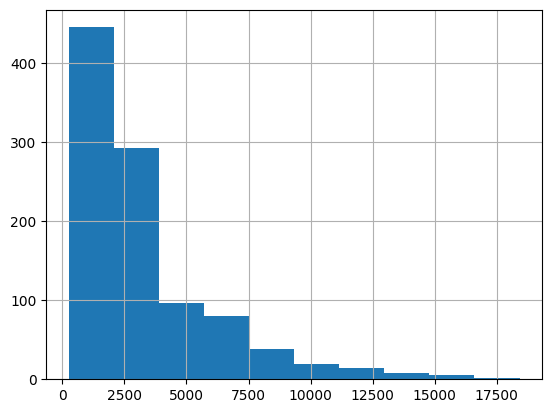

In [18]:
df_credit['credit_amount'].hist()

**Loan amount from work**

H0 No statistically significant differences in the amount according to the qualification criterion

In [57]:
skiled = df_credit[df_credit["job"] == 2]['credit_amount']
unskiled = df_credit[df_credit["job"].isin([0,1])]['credit_amount']
ss.ttest_ind(skiled, unskiled)

Ttest_indResult(statistic=3.6274902508687674, pvalue=0.0003032516814300029)

**There are statistically significant differences in the amount according to the qualification criterion**

**Do average values vary by credit size?**

In [19]:
job_1 = df_credit[df_credit["job"] == 1]['credit_amount']
job_0 = df_credit[df_credit["job"] == 0]['credit_amount']
job_2 = df_credit[df_credit["job"] == 2]['credit_amount']
job_3 = df_credit[df_credit["job"] == 3]['credit_amount']
ss.f_oneway(job_1, job_0, job_2, job_3)

F_onewayResult(statistic=41.85773760572267, pvalue=1.7714719609193288e-25)

**We can conclude that there are statistically significant differences. This means that the average values ​​for the loan size in the aggregate differ**

**Let's prepare data for the test**

In [59]:
data = pd.crosstab(df_credit['job'], df_credit['risk'])
data

risk,bad,good
job,,
0,7,15
1,56,144
2,186,444
3,51,97


In [60]:
ss.chi2_contingency(data)

(1.8851560280131707,
 0.5965815918843431,
 3,
 array([[  6.6,  15.4],
        [ 60. , 140. ],
        [189. , 441. ],
        [ 44.4, 103.6]]))

**We can conclude that the differences are not statistically significant in terms of work**

In [61]:
df_credit['checking_account'].unique()

array(['little', 'moderate', 0, 'rich'], dtype=object)

In [63]:
data = pd.crosstab(df_credit['checking_account'], df_credit['risk'])
ss.chi2_contingency(data)

(123.7209435162656,
 1.2189020722893755e-26,
 3,
 array([[118.2, 275.8],
        [ 82.2, 191.8],
        [ 80.7, 188.3],
        [ 18.9,  44.1]]))

**We can conclude that the differences in stats are significant based on the account status**

In [65]:
data = pd.crosstab(df_credit['purpose'], df_credit['risk'])
ss.chi2_contingency(data)

(13.642086296939734,
 0.05792591119293633,
 7,
 array([[ 29.1,  67.9],
        [101.1, 235.9],
        [  3.6,   8.4],
        [ 17.7,  41.3],
        [ 54.3, 126.7],
        [ 84. , 196. ],
        [  6.6,  15.4],
        [  3.6,   8.4]]))

**There are no statistically significant differences between the groups**

In [24]:
df_credit

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk,age_cat
0,67,male,2,own,0,little,1169,6,radio/TV,good,Старшие
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Студенты
2,49,male,1,own,little,0,2096,12,education,good,Взрослые
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Взрослые
4,53,male,2,free,little,little,4870,24,car,bad,Взрослые
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,0,1736,12,furniture/equipment,good,Молодые
996,40,male,3,own,little,little,3857,30,car,good,Взрослые
997,38,male,2,own,little,0,804,12,radio/TV,good,Взрослые
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Студенты
